In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, Sequential

In [4]:
# downloading CIFAR10 dataset
(trainx, trainy), (testx, testy) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
trainx = trainx.astype(float)
testx = testx.astype(float)

In [6]:
trainy = trainy.astype(float)
testy = testy.astype(float)

trainx = tf.cast(trainx, tf.float32)
testx = tf.cast(testx, tf.float32)

trainy = tf.cast(trainy, tf.int32)
testy = tf.cast(testy, tf.int32)

In [7]:
trainx.shape

(50000, 32, 32, 3)

In [8]:
trainy.shape

(50000, 1)

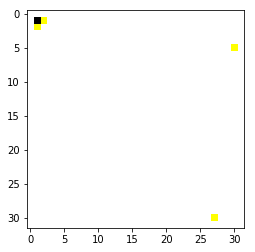

In [9]:
plt.imshow(trainx[0], cmap='gray')

In [10]:
trainy[0]

array([6.])

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
len(class_names)

10

In [12]:
# del model
model = Sequential()

model.add(layers.Conv2D(32, (3,3) ,activation='relu', input_shape=[32, 32, 3]))
model.add(layers.MaxPool2D([2, 2]))

model.add(layers.Conv2D(64, 3,activation='relu'))
model.add(layers.MaxPool2D(2))

model.add(layers.Conv2D(64, 3, activation='relu'))
# model.add(layers.MaxPool2D(2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# model.build([None, 32, 32, 3])
# model.summary()

model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [13]:
for i in model.layers:
    print(i.output_shape)

(None, 30, 30, 32)
(None, 15, 15, 32)
(None, 13, 13, 64)
(None, 6, 6, 64)
(None, 4, 4, 64)
(None, 1024)
(None, 64)
(None, 10)


In [14]:
history = model.fit(trainx,  trainy, validation_split=0.1, epochs=10)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 11s 255us/sample - loss: 1.7049 - accuracy: 0.4015 - val_loss: 1.4728 - val_accuracy: 0.4814
Epoch 2/10
45000/45000 [==============================] - 7s 146us/sample - loss: 1.2946 - accuracy: 0.5413 - val_loss: 1.2469 - val_accuracy: 0.5624
Epoch 3/10
45000/45000 [==============================] - 6s 141us/sample - loss: 1.1540 - accuracy: 0.5937 - val_loss: 1.2034 - val_accuracy: 0.5864
Epoch 4/10
45000/45000 [==============================] - 6s 139us/sample - loss: 1.0578 - accuracy: 0.6338 - val_loss: 1.0867 - val_accuracy: 0.6288
Epoch 5/10
45000/45000 [==============================] - 6s 142us/sample - loss: 0.9684 - accuracy: 0.6653 - val_loss: 1.0280 - val_accuracy: 0.6556
Epoch 6/10
45000/45000 [==============================] - 6s 140us/sample - loss: 0.9064 - accuracy: 0.6867 - val_loss: 1.1489 - val_accuracy: 0.6218
Epoch 7/10
45000/45000 [==========================

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

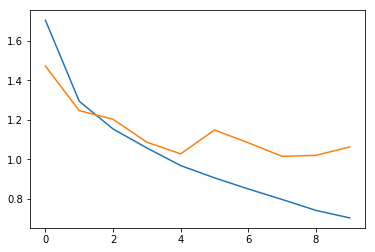

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

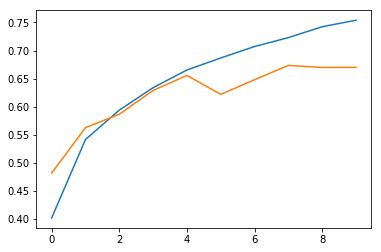

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [19]:
model.evaluate(testx, testy)

10000/10000 [==============================] - 1s 96us/sample - loss: 1.1084 - accuracy: 0.6543


[1.1083549509048463, 0.6543]